## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

In [29]:
# import libraries needed
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
# read in file
shootings_df = pd.read_csv('NYPD_Shooting_Incident_Data__Year_To_Date.csv')

In [31]:
# check number of rows and columns
shootings_df.shape

(1716, 26)

In [32]:
# count the number of categorical variables
cat_count = 0
for dtype in shootings_df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1

In [33]:
print('# of categorical variables:',cat_count)
print('# of continuous variables:',shootings_df.shape[1] - cat_count - 1) #subtract and extra column as 1 column is an ID column

# of categorical variables: 14
# of continuous variables: 11


In [34]:
shootings_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New.Georeferenced.Column,Borough.Boundaries,City.Council.Districts,Police.Precincts,Zip.Codes,Community.Districts
0,243566884,04/12/2022,22:08:00,BRONX,OUTSIDE,49,0,STREET,(null),Y,18-24,M,BLACK HISPANIC,18-24,F,BLACK,1020669,255027,40.866590,-73.868328,POINT (-73.86832754 40.86658962),5.0,22.0,32.0,11605.0,59.0
1,256484816,12/17/2022,04:08:00,BRONX,OUTSIDE,52,0,STREET,(null),N,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1008387,253290,40.861864,-73.912739,POINT (-73.91273918 40.86186421),5.0,29.0,34.0,11606.0,24.0
2,250216145,08/27/2022,00:21:00,BRONX,OUTSIDE,44,0,VEHICLE,(null),N,(null),(null),(null),25-44,M,WHITE HISPANIC,1008878,244480,40.837683,-73.910994,POINT (-73.910994 40.837683),5.0,42.0,27.0,10935.0,50.0
3,239207164,01/15/2022,19:50:00,QUEENS,OUTSIDE,113,2,HOUSING,MULTI DWELL - PUBLIC HOUS,N,(null),(null),(null),18-24,M,BLACK,1044794,188802,40.684689,-73.781699,POINT (-73.781699 40.684689),3.0,46.0,71.0,24669.0,41.0
4,248013313,07/14/2022,01:19:00,BROOKLYN,INSIDE,77,0,DWELLING,MULTI DWELL - APT BUILD,N,(null),(null),(null),25-44,F,BLACK,1002013,185752,40.676508,-73.935960,POINT (-73.93596 40.676508),2.0,49.0,49.0,17615.0,16.0


In [35]:
shootings_df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New.Georeferenced.Column',
       'Borough.Boundaries', 'City.Council.Districts', 'Police.Precincts',
       'Zip.Codes', 'Community.Districts'],
      dtype='object')

### Handling missing data

In [36]:
# missing data
shootings_df.replace("(null)", pd.np.nan, inplace=True) # replace (null) with actual null values
total = shootings_df.isnull().sum().sort_values(ascending=False)
percent = (shootings_df.isnull().sum()/shootings_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LOCATION_DESC,977,0.569347
PERP_AGE_GROUP,640,0.372960
PERP_SEX,640,0.372960
PERP_RACE,640,0.372960
Zip.Codes,14,0.008159
Community.Districts,10,0.005828
Police.Precincts,10,0.005828
City.Council.Districts,10,0.005828
Borough.Boundaries,10,0.005828
New.Georeferenced.Column,10,0.005828


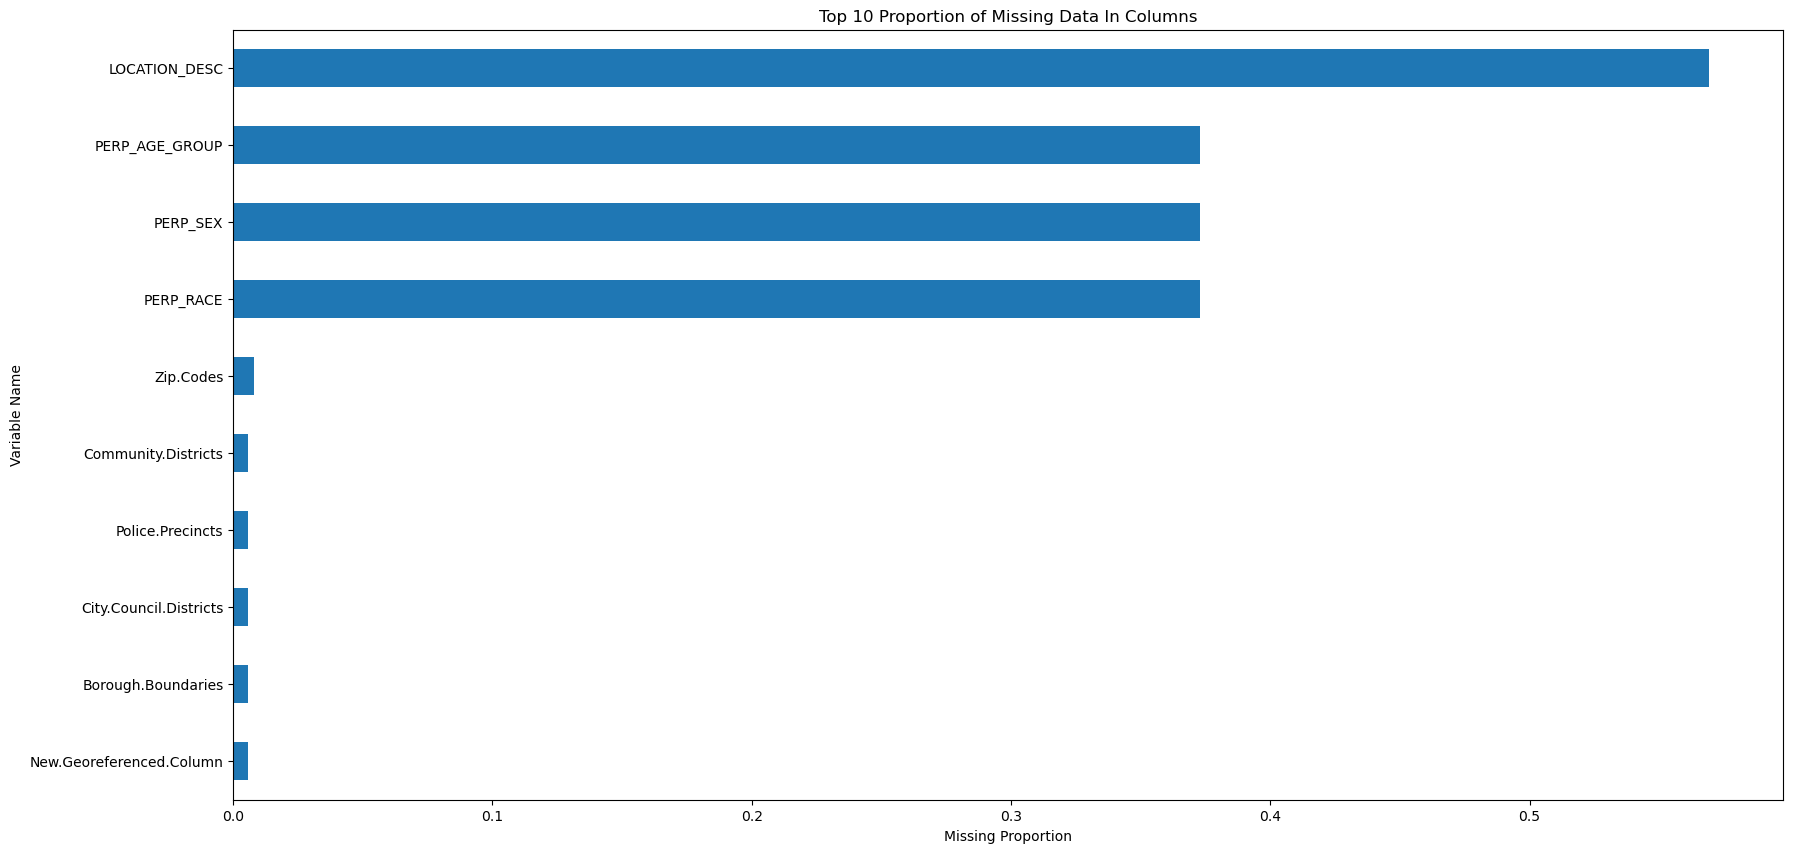

In [37]:
missing_data['Percent'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 10 Proportion of Missing Data In Columns")
plt.show()

In [38]:
# dealing with missing data
shootings_df["LOCATION_DESC"] = shootings_df["LOCATION_DESC"].fillna("None")
shootings_df["PERP_AGE_GROUP"] = shootings_df["PERP_AGE_GROUP"].fillna("None")
shootings_df["PERP_SEX"] = shootings_df["PERP_SEX"].fillna("None")
shootings_df["PERP_RACE"] = shootings_df["PERP_RACE"].fillna("None")

In [39]:
shootings_df["Zip.Codes"] = shootings_df["Zip.Codes"].fillna(shootings_df["Zip.Codes"].mode()[0])
shootings_df["Community.Districts"] = shootings_df["Community.Districts"].fillna(shootings_df["Community.Districts"].mode()[0])
shootings_df["Police.Precincts"] = shootings_df["Police.Precincts"].fillna(shootings_df["Police.Precincts"].mode()[0])
shootings_df["City.Council.Districts"] = shootings_df["City.Council.Districts"].fillna(shootings_df["City.Council.Districts"].mode()[0])
shootings_df["Borough.Boundaries"] = shootings_df["Borough.Boundaries"].fillna(shootings_df["Borough.Boundaries"].mode()[0])
shootings_df["Latitude"] = shootings_df["Latitude"].fillna(shootings_df["Latitude"].median())
shootings_df["Longitude"] = shootings_df["Longitude"].fillna(shootings_df["Longitude"].median())
shootings_df = shootings_df.drop(["New.Georeferenced.Column"], axis=1)

In [40]:
# Check remaining missing values if any 
all_data_na = (shootings_df.isnull().sum() / len(shootings_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Handling Outliers

#### Target Variable